In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
from deepctr.models import *
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

Importing Necessary Data

In [3]:
h1n1_train = pd.read_csv("h1n1_train.csv")

In [4]:
#h1n1_train.head()
h1n1_train.shape

(26707, 31)

In [5]:
seas_train = pd.read_csv("seas_train.csv")

In [6]:
#seas_train.head()
seas_train.shape

(26707, 29)

In [7]:
train_y = pd.read_csv("~/Desktop/flu_shot_learning/data/training_set_labels.csv")

In [8]:
# saving the target values for different viruses seperately
h1n1_y = train_y["h1n1_vaccine"]
seas_y = train_y["seasonal_vaccine"]

Data Preprocessing

In [9]:
# fill nas with -1
h1n1_train = h1n1_train.fillna('-1', )

seas_train = seas_train.fillna('-1', )

In [10]:
h1n1_sparse_features = list(h1n1_train.columns.values)

In [11]:
seas_sparse_features = list(seas_train.columns.values)

In [12]:
# 1.Label Encoding for sparse features,and do simple Transformation for dense features

In [13]:
for feat in h1n1_sparse_features:
    lbe = LabelEncoder()
    h1n1_train[feat] = lbe.fit_transform(h1n1_train[feat].astype(str))

In [14]:
for feat in seas_sparse_features:
    lbe = LabelEncoder()
    seas_train[feat] = lbe.fit_transform(seas_train[feat].astype(str))

In [15]:
h1n1_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size = h1n1_train[feat].nunique(), embedding_dim=2)
                              for i,feat in enumerate(h1n1_sparse_features)]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
seas_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size = seas_train[feat].nunique(), embedding_dim=2)
                              for i,feat in enumerate(seas_sparse_features)]

In [17]:

type(seas_fixlen_feature_columns)

list

In [18]:
h1n1_dnn_feature_columns = h1n1_fixlen_feature_columns
h1n1_linear_feature_columns = h1n1_fixlen_feature_columns

In [19]:
seas_dnn_feature_columns = seas_fixlen_feature_columns
seas_linear_feature_columns = seas_fixlen_feature_columns

In [20]:
h1n1_feature_names = get_feature_names(h1n1_linear_feature_columns + h1n1_dnn_feature_columns)

In [21]:
seas_feature_names = get_feature_names(seas_linear_feature_columns + seas_dnn_feature_columns)

Generate input data for model

In [22]:
h1n1_train_model_input = {name:h1n1_train[name] for name in h1n1_feature_names}

In [23]:
seas_train_model_input = {name:seas_train[name] for name in seas_feature_names}

Model Building

In [53]:
h1n1_model = NFM(h1n1_linear_feature_columns, h1n1_dnn_feature_columns, dnn_hidden_units = [50, 20], task='binary')

In [54]:
h1n1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [1]:
#h1n1_model.summary()

In [56]:
h1n1_history = h1n1_model.fit(h1n1_train_model_input, h1n1_y,
                batch_size = 16, epochs=10)

Epoch 1/10


c:\users\venkatesh k\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1670/1670 [==============================] - 13s 8ms/step - loss: 0.3769 - auc: 0.8394
Epoch 2/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3563 - auc: 0.8581
Epoch 3/10
1670/1670 [==============================] - 14s 8ms/step - loss: 0.3531 - auc: 0.8606
Epoch 4/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3510 - auc: 0.8627
Epoch 5/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.3492 - auc: 0.8645: 0s - loss: 0.3489 - auc: 0.
Epoch 6/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3481 - auc: 0.8655
Epoch 7/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3474 - auc: 0.8660
Epoch 8/10
1670/1670 [==============================] - 14s 8ms/step - loss: 0.3464 - auc: 0.8670
Epoch 9/10
1670/1670 [==============================] - 14s 8ms/step - loss: 0.3457 - auc: 0.8674: 1s - l
Epoch 10/10
1670/1670 [==============================] - 14s 8ms/step - loss: 0.3455 - auc: 

In [57]:
seas_model = NFM(seas_linear_feature_columns, seas_dnn_feature_columns, dnn_hidden_units = [50,20], task='binary')

In [58]:
seas_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [2]:
#seas_model.summary()

In [60]:
seas_history = seas_model.fit(seas_train_model_input, seas_y,
                batch_size = 16, epochs=10)

Epoch 1/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.4949 - auc: 0.8407
Epoch 2/10
1670/1670 [==============================] - 14s 8ms/step - loss: 0.4734 - auc: 0.8553
Epoch 3/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4718 - auc: 0.8562
Epoch 4/10
1670/1670 [==============================] - 11s 7ms/step - loss: 0.4707 - auc: 0.8571
Epoch 5/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4683 - auc: 0.8585
Epoch 6/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4669 - auc: 0.8595
Epoch 7/10
1670/1670 [==============================] - 13s 8ms/step - loss: 0.4661 - auc: 0.8596
Epoch 8/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4650 - auc: 0.8605: 1s - loss: 0 - ETA: 0s - loss: 0.4654 - auc
Epoch 9/10
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4649 - auc: 0.8606: 0s - loss: 0.465
Epoch 10/10
1670/1670 [==============================] 

Prediction

In [61]:
test_id = pd.read_csv("test_id.csv")

In [62]:
test_id.shape

(26708, 1)

In [63]:
h1n1_test = pd.read_csv("h1n1_test.csv")
#h1n1_test.head()
h1n1_test.shape

(26708, 31)

In [64]:
seas_test = pd.read_csv("seas_test.csv")
#seas_test.head()
seas_test.shape

(26708, 29)

Test data preparation

In [65]:
# fill nas with -1
h1n1_test = h1n1_test.fillna('-1', )

seas_test = seas_test.fillna('-1', )

In [66]:
for feat in h1n1_sparse_features:
    lbe = LabelEncoder()
    h1n1_test[feat] = lbe.fit_transform(h1n1_test[feat].astype(str))

In [67]:
h1n1_test_model_input = {name:h1n1_test[name] for name in h1n1_feature_names}

In [68]:
for feat in seas_sparse_features:
    lbe = LabelEncoder()
    seas_test[feat] = lbe.fit_transform(seas_test[feat].astype(str))

In [69]:
seas_test_model_input = {name:seas_test[name] for name in seas_feature_names}

In [70]:
# prediction

In [71]:
h1n1_pred = h1n1_model.predict(h1n1_test_model_input)

In [72]:
print("min prediction:", h1n1_pred.min())
print("max prediction:", h1n1_pred.max())
print("avg prediction:", h1n1_pred.sum()/len(h1n1_pred))

min prediction: 0.00012996793
max prediction: 0.96796423
avg prediction: 0.21255609713147747


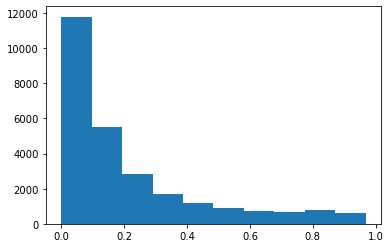

In [73]:
plt.hist(h1n1_pred[:,0], bins = 10)
plt.show()

In [74]:
seas_pred = seas_model.predict(seas_test_model_input)

In [75]:
print("min prediction:", seas_pred.min())
print("max prediction:", seas_pred.max())
print("avg prediction:", seas_pred.sum()/len(seas_pred))

min prediction: 0.018398851
max prediction: 0.9961117
avg prediction: 0.47137499619730044


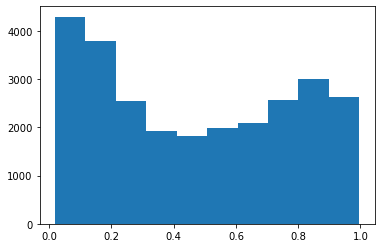

In [76]:
plt.hist(seas_pred[:,0], bins = 10)
plt.show()

In [77]:
submission = pd.DataFrame({
    "respondent_id": test_id['x']
})

In [78]:
submission["h1n1_vaccine"] = h1n1_pred[:,0]

In [79]:
submission["seasonal_vaccine"] = seas_pred[:,0]

In [1]:
#submission.head()

In [81]:
# submission.to_csv("submission_16_NFM_more_hlayers_neurons.csv", index = False)